In [1]:
#Examples of analyzing a data set.The sample data starts from May 2022 to December 2023.
#The code includes bar graphs, pie charts, and line graphs for all sites, as well as various time frames such as monthly, daily, hourly, and minute-based data. 
#The goal is to examine the public space utilization in each format. 
#The research team only presented a partial graph analysis in the paper, but this code includes analyses from all of the graph formats mentioned. 
#This comprehensive code is intended to allow other researchers to use it on their own data in the future.

from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as sparkf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from matplotlib.ticker import FuncFormatter

In [2]:
spark = SparkSession.builder.appName("paper2").getOrCreate()

24/07/24 03:54:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [3]:
main_df = spark.read.csv('total_2022_m05_to_2023_m12_client_wifi.csv',header=True,inferSchema=True)
main_df.show()

+-------------------+--------+------+
|          timestamp|deviceid|siteid|
+-------------------+--------+------+
|2022-07-01 00:00:03|       1|     7|
|2022-07-01 00:00:03|       2|     9|
|2022-07-01 00:00:03|       3|     9|
|2022-07-01 00:00:03|       4|     9|
|2022-07-01 00:00:03|       5|     4|
|2022-07-01 00:00:03|       6|     6|
|2022-07-01 00:00:04|       7|     6|
|2022-07-01 00:00:04|       6|     5|
|2022-07-01 00:01:02|       1|     7|
|2022-07-01 00:01:02|       2|     9|
|2022-07-01 00:01:02|       3|     9|
|2022-07-01 00:01:02|       4|     9|
|2022-07-01 00:01:02|       5|     4|
|2022-07-01 00:01:02|       6|     6|
|2022-07-01 00:01:03|       7|     6|
|2022-07-01 00:01:03|       6|     5|
|2022-07-01 00:02:02|       1|     7|
|2022-07-01 00:02:02|       2|     9|
|2022-07-01 00:02:02|       4|     9|
|2022-07-01 00:02:02|       5|     4|
+-------------------+--------+------+
only showing top 20 rows



In [4]:
main_df.count()

73733455

In [5]:
main_df = main_df.withColumn('timestamp',main_df['timestamp'].cast('timestamp'))

In [6]:
main_df.printSchema()

root
 |-- timestamp: timestamp (nullable = true)
 |-- deviceid: integer (nullable = true)
 |-- siteid: integer (nullable = true)



In [7]:
main_df_drop = main_df.dropDuplicates()
main_df_drop.show()

+-------------------+--------+------+
|          timestamp|deviceid|siteid|
+-------------------+--------+------+
|2022-05-22 14:42:35|      99|     8|
|2022-05-22 14:42:35|     204|     6|
|2022-05-22 14:42:35|    4608|     3|
|2022-05-22 14:42:54|      37|     2|
|2022-05-22 14:42:54|      69|     7|
|2022-05-22 14:42:54|     144|     7|
|2022-05-22 14:42:54|     179|     3|
|2022-05-22 14:42:54|     433|     7|
|2022-05-22 14:43:07|     298|     9|
|2022-05-22 14:43:07|    4593|     7|
|2022-05-22 14:43:56|     433|     3|
|2022-05-22 14:44:27|    4582|     5|
|2022-05-22 14:44:27|    5013|     5|
|2022-05-22 14:44:42|     893|     3|
|2022-05-22 14:44:59|    4668|     9|
|2022-05-22 14:45:17|      21|     8|
|2022-05-22 14:45:17|     433|     5|
|2022-05-22 14:45:17|     458|     3|
|2022-05-22 14:45:17|    4712|     5|
|2022-05-22 14:45:17|    4961|     8|
+-------------------+--------+------+
only showing top 20 rows



In [8]:
main_df_drop.count()

71521210

In [9]:
site_info = spark.read.csv('access_point_locations.csv',header=True, inferSchema=True)
site_info.show()

+------+--------------------+-----------+------------+
|siteid|            sitename|   latitude|   longitude|
+------+--------------------+-----------+------------+
|     1|  Klong-soi-1 Bridge|17.96530959|102.56014981|
|     2|Village Fund buil...|17.96298473|102.56672917|
|     3|In front of Chang...|17.95974745|102.57895782|
|     4|In front of Klang...|17.95912645|102.58417066|
|     5|Sri Chiang Mai Co...| 17.9589032|102.58734054|
|     6|      Naga Courtyard|17.95900134| 102.5889415|
|     7|In front of Had P...|17.95900381|102.59049874|
|     8|Boeng Wiang Court...|17.95866402|102.59089603|
|     9|In front of Fresh...| 17.9568754|  102.585087|
|    10|              Soi-19|  17.958885|  102.585845|
|    11|              Soi-16|  17.959502|  102.581291|
+------+--------------------+-----------+------------+



In [10]:
site_info.printSchema()

root
 |-- siteid: integer (nullable = true)
 |-- sitename: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)



In [11]:
df = main_df_drop.join(site_info,'siteid','left')
df.show()

+------+-------------------+--------+--------------------+-----------+------------+
|siteid|          timestamp|deviceid|            sitename|   latitude|   longitude|
+------+-------------------+--------+--------------------+-----------+------------+
|     8|2022-05-22 14:42:35|      99|Boeng Wiang Court...|17.95866402|102.59089603|
|     6|2022-05-22 14:42:35|     204|      Naga Courtyard|17.95900134| 102.5889415|
|     3|2022-05-22 14:42:35|    4608|In front of Chang...|17.95974745|102.57895782|
|     2|2022-05-22 14:42:54|      37|Village Fund buil...|17.96298473|102.56672917|
|     7|2022-05-22 14:42:54|      69|In front of Had P...|17.95900381|102.59049874|
|     7|2022-05-22 14:42:54|     144|In front of Had P...|17.95900381|102.59049874|
|     3|2022-05-22 14:42:54|     179|In front of Chang...|17.95974745|102.57895782|
|     7|2022-05-22 14:42:54|     433|In front of Had P...|17.95900381|102.59049874|
|     9|2022-05-22 14:43:07|     298|In front of Fresh...| 17.9568754|  102.

In [12]:
df = df.withColumn('day_of_week', sparkf.date_format('timestamp','EEEE'))\
.withColumn('hrs',sparkf.hour('timestamp'))\
.withColumn('minutes',sparkf.minute('timestamp'))

In [13]:
df = df.withColumn('day_period',sparkf.when((df['hrs'] >= 0) & (df['hrs'] < 3), '00:00-02:59')\
    .when((df['hrs'] >= 3) & (df['hrs'] < 6), '03:00-05:59')\
    .when((df['hrs'] >= 6) & (df['hrs'] < 9), '06:00-08:59')\
    .when((df['hrs'] >= 9) & (df['hrs'] < 12), '09:00-11:59')\
    .when((df['hrs'] >= 12) & (df['hrs'] < 15), '12:00-14:59')\
    .when((df['hrs'] >= 15) & (df['hrs'] < 18), '15:00-17:59')\
    .when((df['hrs'] >= 18) & (df['hrs'] < 21), '18:00-20:59')\
    .otherwise('21:00-23:59'))

In [14]:
df = df.drop('latitude','longitude')

In [15]:
df = df.withColumn('yearMonth',sparkf.date_format("timestamp", "yyyy-MM"))
df.show()

+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+
|siteid|          timestamp|deviceid|            sitename|day_of_week|hrs|minutes| day_period|yearMonth|
+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+
|     8|2022-05-22 14:42:35|      99|Boeng Wiang Court...|     Sunday| 14|     42|12:00-14:59|  2022-05|
|     6|2022-05-22 14:42:35|     204|      Naga Courtyard|     Sunday| 14|     42|12:00-14:59|  2022-05|
|     3|2022-05-22 14:42:35|    4608|In front of Chang...|     Sunday| 14|     42|12:00-14:59|  2022-05|
|     2|2022-05-22 14:42:54|      37|Village Fund buil...|     Sunday| 14|     42|12:00-14:59|  2022-05|
|     7|2022-05-22 14:42:54|      69|In front of Had P...|     Sunday| 14|     42|12:00-14:59|  2022-05|
|     7|2022-05-22 14:42:54|     144|In front of Had P...|     Sunday| 14|     42|12:00-14:59|  2022-05|
|     3|2022-05-22 14:42:54|     179|In front of Chang.

In [16]:
df = df.withColumn('Myy',sparkf.date_format("timestamp", "yyyy-MMM"))
df.show()

+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+
|siteid|          timestamp|deviceid|            sitename|day_of_week|hrs|minutes| day_period|yearMonth|     Myy|
+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+
|     8|2022-05-22 14:42:35|      99|Boeng Wiang Court...|     Sunday| 14|     42|12:00-14:59|  2022-05|2022-May|
|     6|2022-05-22 14:42:35|     204|      Naga Courtyard|     Sunday| 14|     42|12:00-14:59|  2022-05|2022-May|
|     3|2022-05-22 14:42:35|    4608|In front of Chang...|     Sunday| 14|     42|12:00-14:59|  2022-05|2022-May|
|     2|2022-05-22 14:42:54|      37|Village Fund buil...|     Sunday| 14|     42|12:00-14:59|  2022-05|2022-May|
|     7|2022-05-22 14:42:54|      69|In front of Had P...|     Sunday| 14|     42|12:00-14:59|  2022-05|2022-May|
|     7|2022-05-22 14:42:54|     144|In front of Had P...|     Sunday| 14|     42|12:00-

In [17]:
df.show()

+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+
|siteid|          timestamp|deviceid|            sitename|day_of_week|hrs|minutes| day_period|yearMonth|     Myy|
+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+
|     8|2022-05-22 14:42:35|      99|Boeng Wiang Court...|     Sunday| 14|     42|12:00-14:59|  2022-05|2022-May|
|     6|2022-05-22 14:42:35|     204|      Naga Courtyard|     Sunday| 14|     42|12:00-14:59|  2022-05|2022-May|
|     3|2022-05-22 14:42:35|    4608|In front of Chang...|     Sunday| 14|     42|12:00-14:59|  2022-05|2022-May|
|     2|2022-05-22 14:42:54|      37|Village Fund buil...|     Sunday| 14|     42|12:00-14:59|  2022-05|2022-May|
|     7|2022-05-22 14:42:54|      69|In front of Had P...|     Sunday| 14|     42|12:00-14:59|  2022-05|2022-May|
|     7|2022-05-22 14:42:54|     144|In front of Had P...|     Sunday| 14|     42|12:00-

In [18]:
bySite_yyyy_MMM_total = df.groupBy(['yearMonth','Myy']).agg(sparkf.countDistinct("deviceid").alias("distinct_device_count"))
bySite_yyyy_MMM_total.show()

+---------+--------+---------------------+
|yearMonth|     Myy|distinct_device_count|
+---------+--------+---------------------+
|  2023-03|2023-Mar|                 3916|
|  2023-04|2023-Apr|                 3970|
|  2022-11|2022-Nov|                 2817|
|  2023-01|2023-Jan|                 3115|
|  2022-07|2022-Jul|                 1516|
|  2023-08|2023-Aug|                 4132|
|  2023-07|2023-Jul|                 3828|
|  2023-06|2023-Jun|                 3747|
|  2023-11|2023-Nov|                 4713|
|  2023-09|2023-Sep|                 4769|
|  2023-12|2023-Dec|                 5095|
|  2023-02|2023-Feb|                 3408|
|  2023-10|2023-Oct|                 5114|
|  2022-10|2022-Oct|                 3507|
|  2022-12|2022-Dec|                 2958|
|  2022-05|2022-May|                 2371|
|  2022-09|2022-Sep|                 2330|
|  2022-06|2022-Jun|                 1223|
|  2022-08|2022-Aug|                 1532|
|  2023-05|2023-May|                 4007|
+---------+

In [19]:
bySite_yyyy_MMM_total = bySite_yyyy_MMM_total.orderBy("yearMonth")
bySite_yyyy_MMM_total.show()

+---------+--------+---------------------+
|yearMonth|     Myy|distinct_device_count|
+---------+--------+---------------------+
|  2022-05|2022-May|                 2371|
|  2022-06|2022-Jun|                 1223|
|  2022-07|2022-Jul|                 1516|
|  2022-08|2022-Aug|                 1532|
|  2022-09|2022-Sep|                 2330|
|  2022-10|2022-Oct|                 3507|
|  2022-11|2022-Nov|                 2817|
|  2022-12|2022-Dec|                 2958|
|  2023-01|2023-Jan|                 3115|
|  2023-02|2023-Feb|                 3408|
|  2023-03|2023-Mar|                 3916|
|  2023-04|2023-Apr|                 3970|
|  2023-05|2023-May|                 4007|
|  2023-06|2023-Jun|                 3747|
|  2023-07|2023-Jul|                 3828|
|  2023-08|2023-Aug|                 4132|
|  2023-09|2023-Sep|                 4769|
|  2023-10|2023-Oct|                 5114|
|  2023-11|2023-Nov|                 4713|
|  2023-12|2023-Dec|                 5095|
+---------+

In [20]:
bySite_yyyy_MMM_total_pd = bySite_yyyy_MMM_total.toPandas()
bySite_yyyy_MMM_total_pd

,yearMonth,Myy,distinct_device_count
0,2022-05,2022-May,2371
1,2022-06,2022-Jun,1223
2,2022-07,2022-Jul,1516
3,2022-08,2022-Aug,1532
4,2022-09,2022-Sep,2330
5,2022-10,2022-Oct,3507
6,2022-11,2022-Nov,2817
7,2022-12,2022-Dec,2958
8,2023-01,2023-Jan,3115
9,2023-02,2023-Feb,3408


In [21]:
bySite_yyyy_MMM_total_pd.to_csv('p2_bySite_yyyy_MMM_total_pd.csv',index=False)

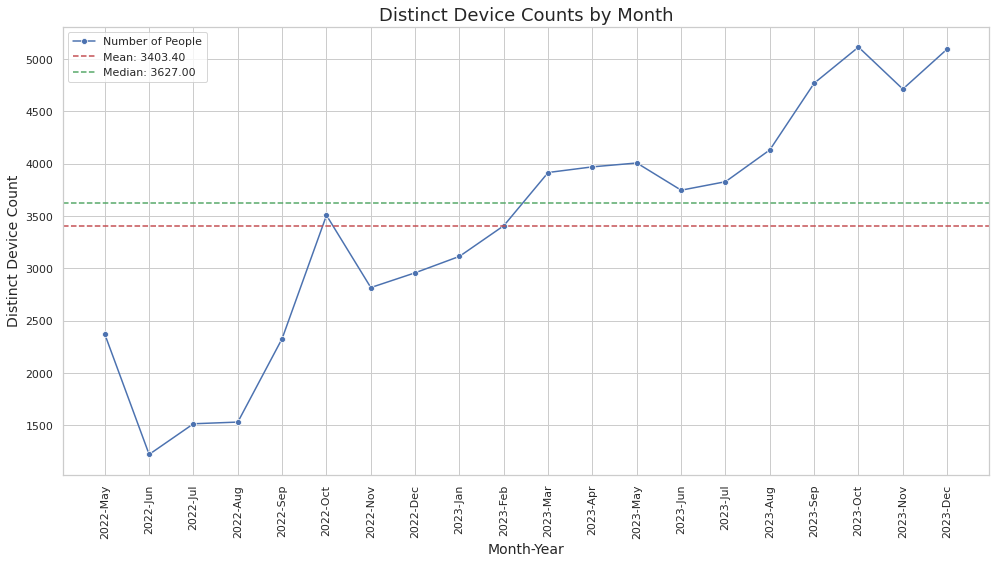

In [22]:
mean_value = bySite_yyyy_MMM_total_pd['distinct_device_count'].mean()
median_value = bySite_yyyy_MMM_total_pd['distinct_device_count'].median()
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.lineplot(data=bySite_yyyy_MMM_total_pd, x='Myy', y='distinct_device_count', marker='o',label='Number of People')
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(y=median_value, color='g', linestyle='--', label=f'Median: {median_value:.2f}')
plt.title('Distinct Device Counts by Month', fontsize=18)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Distinct Device Count', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

In [23]:
bySite_yyyy_MMM_pv = df.groupBy('sitename').pivot('Myy').agg(sparkf.countDistinct("deviceid")).na.fill(0)
bySite_yyyy_MMM_pv.show()

+--------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|            sitename|2022-Aug|2022-Dec|2022-Jul|2022-Jun|2022-May|2022-Nov|2022-Oct|2022-Sep|2023-Apr|2023-Aug|2023-Dec|2023-Feb|2023-Jan|2023-Jul|2023-Jun|2023-Mar|2023-May|2023-Nov|2023-Oct|2023-Sep|
+--------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|In front of Chang...|     514|     415|     488|     409|     635|     573|     658|     578|     459|     410|     503|     518|     416|     448|     452|     539|     485|     565|     513|     468|
|Sri Chiang Mai Co...|     747|    1432|     781|     582|    1080|    1238|    1473|    1158|    1849|    2181|    2640|    1647|    1523|    1927|    1910|    1780|    2029|    2558|    

In [24]:
new_col = ['sitename','2022-May','2022-Jun','2022-Jul','2022-Aug','2022-Sep','2022-Oct','2022-Nov','2022-Dec',
             '2023-Jan','2023-Feb','2023-Mar','2023-Apr','2023-May','2023-Jun','2023-Jul','2023-Aug','2023-Sep',
             '2023-Oct','2023-Nov','2023-Dec']

In [25]:
bySite_yyyy_MMM_pv = bySite_yyyy_MMM_pv.select(*new_col)
bySite_yyyy_MMM_pv.show()

+--------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|            sitename|2022-May|2022-Jun|2022-Jul|2022-Aug|2022-Sep|2022-Oct|2022-Nov|2022-Dec|2023-Jan|2023-Feb|2023-Mar|2023-Apr|2023-May|2023-Jun|2023-Jul|2023-Aug|2023-Sep|2023-Oct|2023-Nov|2023-Dec|
+--------------------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|In front of Chang...|     635|     409|     488|     514|     578|     658|     573|     415|     416|     518|     539|     459|     485|     452|     448|     410|     468|     513|     565|     503|
|Sri Chiang Mai Co...|    1080|     582|     781|     747|    1158|    1473|    1238|    1432|    1523|    1647|    1780|    1849|    2029|    1910|    1927|    2181|    2646|    2852|    

In [26]:
bySite_yyyy_MMM_pv = bySite_yyyy_MMM_pv.toPandas()
bySite_yyyy_MMM_pv

,sitename,2022-May,2022-Jun,2022-Jul,2022-Aug,2022-Sep,2022-Oct,2022-Nov,2022-Dec,2023-Jan,...,2023-Mar,2023-Apr,2023-May,2023-Jun,2023-Jul,2023-Aug,2023-Sep,2023-Oct,2023-Nov,2023-Dec
0,In front of Chang Phueak Temple,635,409,488,514,578,658,573,415,416,...,539,459,485,452,448,410,468,513,565,503
1,Sri Chiang Mai Community Health Park,1080,582,781,747,1158,1473,1238,1432,1523,...,1780,1849,2029,1910,1927,2181,2646,2852,2558,2640
2,Soi-16,0,0,0,0,0,0,0,0,536,...,527,511,531,504,539,514,78,22,370,525
3,Naga Courtyard,1157,581,674,662,696,1419,1262,1485,1421,...,1520,1484,1547,1443,1553,1636,2355,2544,1946,1969
4,In front of Had Pathum Temple,1220,614,773,733,1085,1689,1092,1310,1307,...,1482,1550,1462,1463,1507,1654,2544,2742,1946,2094
5,Soi-19,0,0,0,0,0,0,0,0,435,...,446,377,374,385,342,345,364,396,356,384
6,Klong-soi-1 Bridge,85,56,77,103,85,104,93,97,0,...,0,0,0,0,0,0,0,0,0,0
7,Boeng Wiang Courtyard,710,187,133,523,868,1613,962,1116,1033,...,1605,1732,1545,1278,1432,1690,2383,2602,1989,2223
8,In front of Klang Temple,655,435,582,619,875,1116,1006,1174,1144,...,1376,1384,1525,1442,1568,1600,2055,2226,1924,2136
9,In front of Fresh Market,1260,766,939,1026,1327,1422,1355,1549,1551,...,1752,1907,1981,1930,1970,2009,2318,2477,2426,2441


In [27]:
bySite_yyyy_MMM_pv.to_csv('bySite_yyyy_MMM_pv.csv',index=False)

In [28]:
df_bySite_yyyyMMM_melted = pd.melt(bySite_yyyy_MMM_pv, id_vars=['sitename'], var_name='Myy', value_name='value')
df_bySite_yyyyMMM_melted.head()

,sitename,Myy,value
0,In front of Chang Phueak Temple,2022-May,635
1,Sri Chiang Mai Community Health Park,2022-May,1080
2,Soi-16,2022-May,0
3,Naga Courtyard,2022-May,1157
4,In front of Had Pathum Temple,2022-May,1220


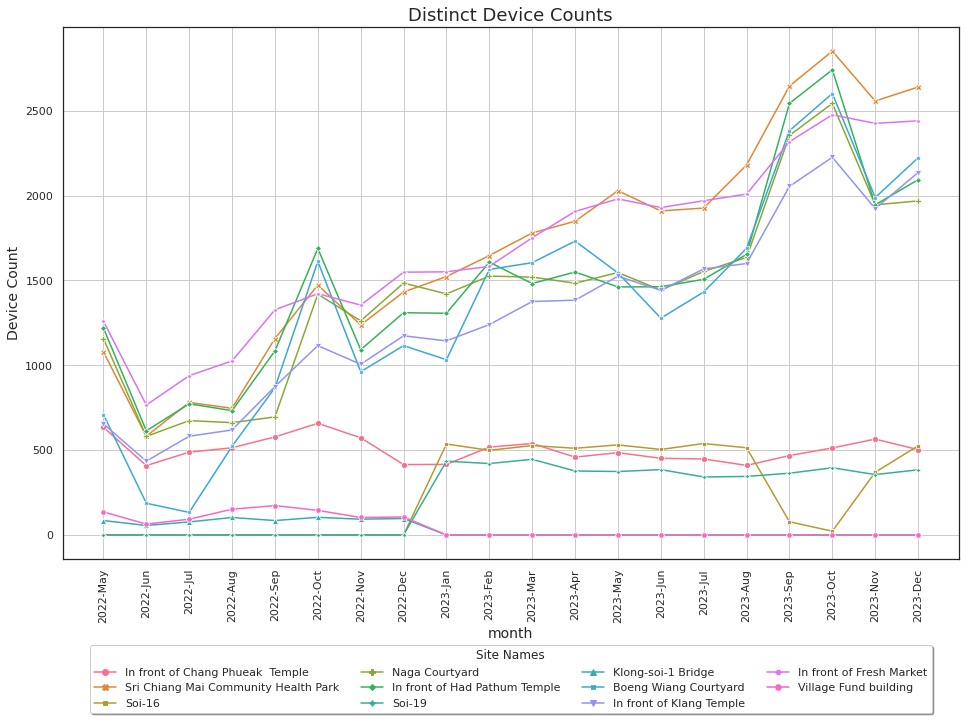

In [29]:
sns.set(style="white")
plt.figure(figsize=(14, 10))
sns.lineplot(data=df_bySite_yyyyMMM_melted, x='Myy', y='value', hue='sitename', style='sitename', markers=True, dashes=False)
plt.title('Distinct Device Counts', fontsize=18)
plt.xlabel('month', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Device Count', fontsize=14)
plt.subplots_adjust(bottom=0.25)
plt.legend(title='Site Names', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)
plt.tight_layout()
plt.grid(True)
plt.show()

In [30]:
bySite_weekday = df.groupBy('day_of_week').agg(sparkf.countDistinct("deviceid").alias("distinct_device_count"))
bySite_weekday.show()

+-----------+---------------------+
|day_of_week|distinct_device_count|
+-----------+---------------------+
|  Wednesday|                 9583|
|    Tuesday|                 9496|
|     Friday|                10381|
|   Thursday|                 9894|
|   Saturday|                10394|
|     Monday|                 9615|
|     Sunday|                11424|
+-----------+---------------------+



In [31]:
bySite_weekday_pd = bySite_weekday.toPandas()
bySite_weekday_pd

,day_of_week,distinct_device_count
0,Wednesday,9583
1,Tuesday,9496
2,Friday,10381
3,Thursday,9894
4,Saturday,10394
5,Monday,9615
6,Sunday,11424


In [32]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [33]:
bySite_weekday_pd['day_of_week'] = pd.Categorical(bySite_weekday_pd['day_of_week'], categories=days_order, ordered=True)
bySite_weekday_pd

,day_of_week,distinct_device_count
0,Wednesday,9583
1,Tuesday,9496
2,Friday,10381
3,Thursday,9894
4,Saturday,10394
5,Monday,9615
6,Sunday,11424


In [34]:
bySite_weekday_pd_sorted = bySite_weekday_pd.sort_values('day_of_week')
bySite_weekday_pd_sorted

,day_of_week,distinct_device_count
5,Monday,9615
1,Tuesday,9496
0,Wednesday,9583
3,Thursday,9894
2,Friday,10381
4,Saturday,10394
6,Sunday,11424


In [35]:
bySite_weekday_pd_sorted.to_csv('bySite_weekday_pd_sorted.csv',index=False)

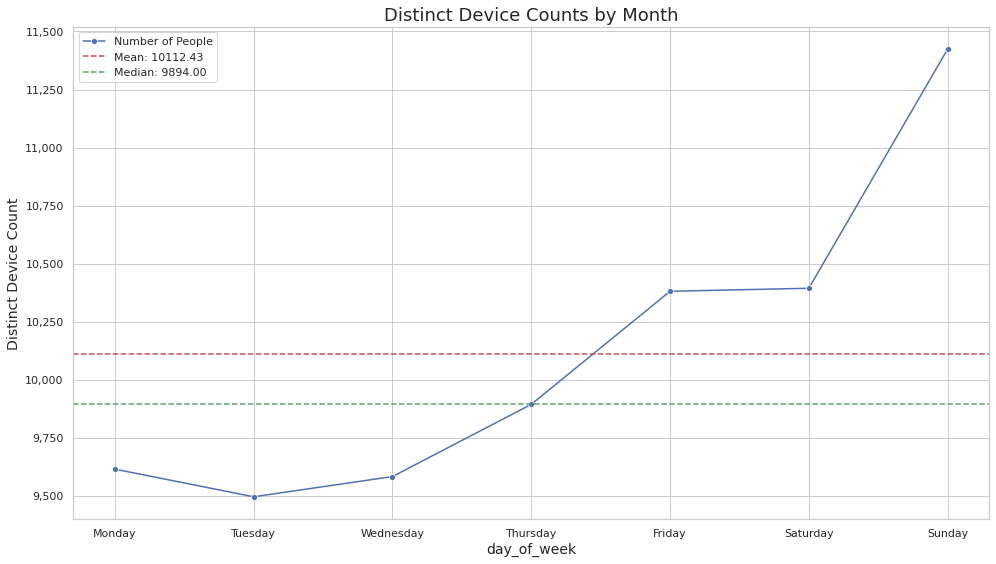

In [36]:
mean_value = bySite_weekday_pd_sorted['distinct_device_count'].mean()
median_value = bySite_weekday_pd_sorted['distinct_device_count'].median()
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
ax = sns.lineplot(data=bySite_weekday_pd_sorted, x='day_of_week', y='distinct_device_count', marker='o',label='Number of People')
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p : "{:,.0f}".format(v)))
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axhline(y=median_value, color='g', linestyle='--', label=f'Median: {median_value:.2f}')
plt.title('Distinct Device Counts by Month', fontsize=18)
plt.xlabel('day_of_week', fontsize=14)
plt.ylabel('Distinct Device Count', fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

In [37]:
bySite_weekday_pv = df.groupBy('sitename').pivot('day_of_week').agg(sparkf.countDistinct("deviceid")).na.fill(0)
bySite_weekday_pv.show()

+--------------------+------+------+--------+------+--------+-------+---------+
|            sitename|Friday|Monday|Saturday|Sunday|Thursday|Tuesday|Wednesday|
+--------------------+------+------+--------+------+--------+-------+---------+
|In front of Chang...|  1310|  1360|    1293|  1630|    1256|   1326|     1267|
|Sri Chiang Mai Co...|  5478|  4990|    5280|  5666|    5171|   4902|     4969|
|              Soi-16|   897|   861|     867|   816|     889|    830|      857|
|      Naga Courtyard|  4714|  4238|    4645|  4925|    4412|   4095|     4225|
|In front of Had P...|  5015|  4209|    5033|  4989|    4618|   4396|     4307|
|              Soi-19|   711|   699|     702|   699|     738|    674|      683|
|  Klong-soi-1 Bridge|   133|   109|     159|   156|     115|    112|      102|
|Boeng Wiang Court...|  4547|  3716|    4671|  4457|    4329|   3952|     4072|
|In front of Klang...|  4060|  3835|    4036|  4177|    3849|   3742|     3663|
|In front of Fresh...|  5022|  4930|    

In [38]:
bySite_weekday_pv_pd = bySite_weekday_pv.toPandas()
bySite_weekday_pv_pd

,sitename,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,In front of Chang Phueak Temple,1310,1360,1293,1630,1256,1326,1267
1,Sri Chiang Mai Community Health Park,5478,4990,5280,5666,5171,4902,4969
2,Soi-16,897,861,867,816,889,830,857
3,Naga Courtyard,4714,4238,4645,4925,4412,4095,4225
4,In front of Had Pathum Temple,5015,4209,5033,4989,4618,4396,4307
5,Soi-19,711,699,702,699,738,674,683
6,Klong-soi-1 Bridge,133,109,159,156,115,112,102
7,Boeng Wiang Courtyard,4547,3716,4671,4457,4329,3952,4072
8,In front of Klang Temple,4060,3835,4036,4177,3849,3742,3663
9,In front of Fresh Market,5022,4930,4994,5582,4902,4847,4764


In [39]:
bySite_weekday_pv_pd.to_csv('bySite_weekday_pv_pd.csv',index=False)

In [40]:
df_bySite_weekday_melted = pd.melt(bySite_weekday_pv_pd, id_vars=['sitename'], var_name='day_of_week', value_name='value')
df_bySite_weekday_melted.head()

,sitename,day_of_week,value
0,In front of Chang Phueak Temple,Friday,1310
1,Sri Chiang Mai Community Health Park,Friday,5478
2,Soi-16,Friday,897
3,Naga Courtyard,Friday,4714
4,In front of Had Pathum Temple,Friday,5015


In [41]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_bySite_weekday_melted['day_of_week'] = pd.Categorical(df_bySite_weekday_melted['day_of_week'], categories=days_order, ordered=True)
df_bySite_weekday_melted

,sitename,day_of_week,value
0,In front of Chang Phueak Temple,Friday,1310
1,Sri Chiang Mai Community Health Park,Friday,5478
2,Soi-16,Friday,897
3,Naga Courtyard,Friday,4714
4,In front of Had Pathum Temple,Friday,5015
...,...,...,...
72,Klong-soi-1 Bridge,Wednesday,102
73,Boeng Wiang Courtyard,Wednesday,4072
74,In front of Klang Temple,Wednesday,3663
75,In front of Fresh Market,Wednesday,4764


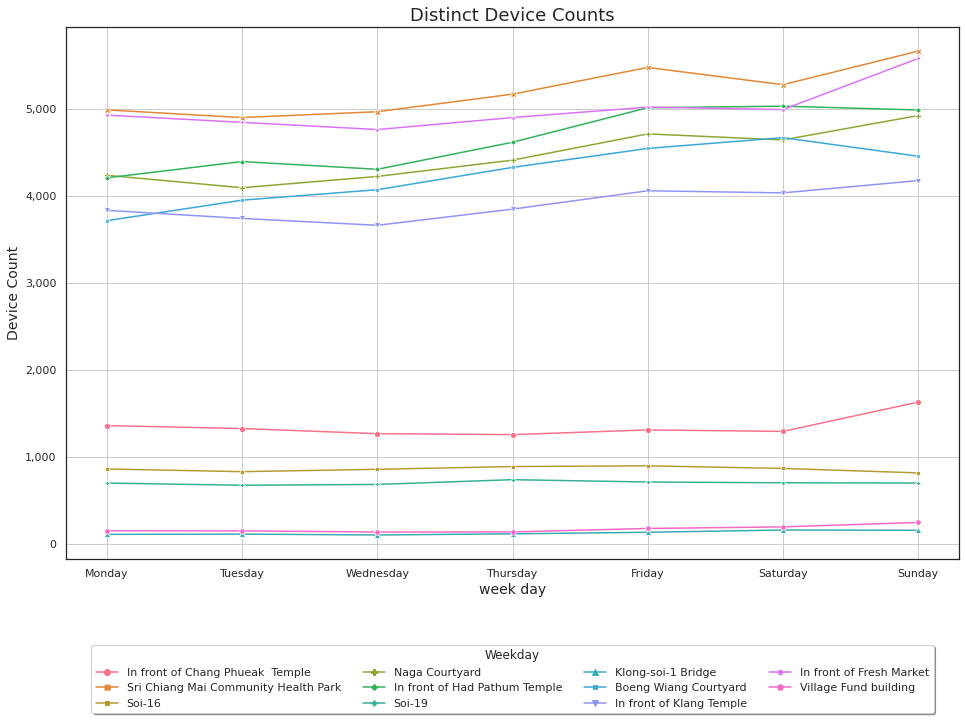

In [42]:
sns.set(style="white")
plt.figure(figsize=(14, 10))
ax = sns.lineplot(data=df_bySite_weekday_melted, x='day_of_week', y='value', hue='sitename', style='sitename', markers=True, dashes=False)
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p : "{:,.0f}".format(v)))
plt.title('Distinct Device Counts', fontsize=18)
plt.xlabel('week day', fontsize=14)
plt.ylabel('Device Count', fontsize=14)
plt.subplots_adjust(bottom=0.25)
plt.legend(title='Weekday', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4)
plt.tight_layout()
plt.grid(True)
plt.show()

In [43]:
byYmSite = df.groupBy('yearMonth','Myy').pivot('sitename').agg(sparkf.countDistinct('deviceid')).na.fill(0).orderBy('yearMonth')
byYmSite.show()

+---------+--------+---------------------+--------------------------------+------------------------+-----------------------------+------------------------+------------------+--------------+------+------+------------------------------------+---------------------+
|yearMonth|     Myy|Boeng Wiang Courtyard|In front of Chang Phueak  Temple|In front of Fresh Market|In front of Had Pathum Temple|In front of Klang Temple|Klong-soi-1 Bridge|Naga Courtyard|Soi-16|Soi-19|Sri Chiang Mai Community Health Park|Village Fund building|
+---------+--------+---------------------+--------------------------------+------------------------+-----------------------------+------------------------+------------------+--------------+------+------+------------------------------------+---------------------+
|  2022-05|2022-May|                  710|                             635|                    1260|                         1220|                     655|                85|          1157|     0|     0|        

In [44]:
byYmSite_pd = byYmSite.toPandas()
byYmSite_pd

,yearMonth,Myy,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Klong-soi-1 Bridge,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,Village Fund building
0,2022-05,2022-May,710,635,1260,1220,655,85,1157,0,0,1080,136
1,2022-06,2022-Jun,187,409,766,614,435,56,581,0,0,582,64
2,2022-07,2022-Jul,133,488,939,773,582,77,674,0,0,781,93
3,2022-08,2022-Aug,523,514,1026,733,619,103,662,0,0,747,152
4,2022-09,2022-Sep,868,578,1327,1085,875,85,696,0,0,1158,173
5,2022-10,2022-Oct,1613,658,1422,1689,1116,104,1419,0,0,1473,145
6,2022-11,2022-Nov,962,573,1355,1092,1006,93,1262,0,0,1238,103
7,2022-12,2022-Dec,1116,415,1549,1310,1174,97,1485,0,0,1432,106
8,2023-01,2023-Jan,1033,416,1551,1307,1144,0,1421,536,435,1523,0
9,2023-02,2023-Feb,1565,518,1583,1608,1240,0,1526,499,421,1647,0


In [45]:
byYmSite_pd.set_index('Myy',inplace=True)
byYmSite_pd

,yearMonth,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Klong-soi-1 Bridge,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,Village Fund building
Myy,,,,,,,,,,,,
2022-May,2022-05,710,635,1260,1220,655,85,1157,0,0,1080,136
2022-Jun,2022-06,187,409,766,614,435,56,581,0,0,582,64
2022-Jul,2022-07,133,488,939,773,582,77,674,0,0,781,93
2022-Aug,2022-08,523,514,1026,733,619,103,662,0,0,747,152
2022-Sep,2022-09,868,578,1327,1085,875,85,696,0,0,1158,173
2022-Oct,2022-10,1613,658,1422,1689,1116,104,1419,0,0,1473,145
2022-Nov,2022-11,962,573,1355,1092,1006,93,1262,0,0,1238,103
2022-Dec,2022-12,1116,415,1549,1310,1174,97,1485,0,0,1432,106
2023-Jan,2023-01,1033,416,1551,1307,1144,0,1421,536,435,1523,0


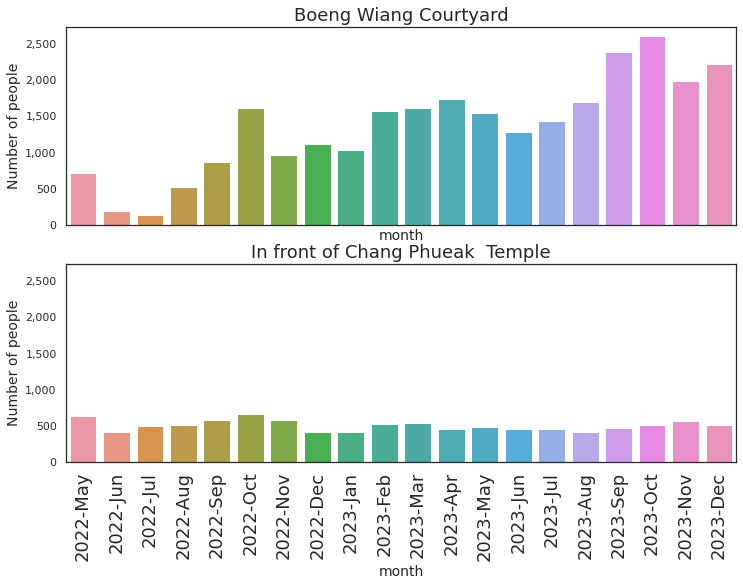

In [46]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(12, 8))
site_list = byYmSite_pd.columns
ax0 = sns.barplot(x=byYmSite_pd.index, y=byYmSite_pd[site_list[1]],data=byYmSite_pd,ax=ax[0])
ax[0].set_title(site_list[1],fontsize=18)
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda v, p : "{:,.0f}".format(v)))
ax[0].set_ylabel('Number of people',fontsize=14)
ax[0].set_xlabel('month',fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90,fontsize=14)
ax1 = sns.barplot(x=byYmSite_pd.index, y=byYmSite_pd[site_list[2]],data=byYmSite_pd,ax=ax[1])
ax[1].set_title(site_list[2],fontsize=18)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda v, p : "{:,.0f}".format(v)))
ax[1].set_ylabel('Number of people',fontsize=14)
ax[1].set_xlabel('month',fontsize=14)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90,fontsize=18);

In [47]:
apr2023_df = df.filter(df['yearMonth']=='2023-04')
apr2023_df.show()

+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+
|siteid|          timestamp|deviceid|            sitename|day_of_week|hrs|minutes| day_period|yearMonth|     Myy|
+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+
|    11|2023-04-01 00:02:01|     239|              Soi-16|   Saturday|  0|      2|00:00-02:59|  2023-04|2023-Apr|
|     9|2023-04-01 00:05:03|     901|In front of Fresh...|   Saturday|  0|      5|00:00-02:59|  2023-04|2023-Apr|
|     9|2023-04-01 00:10:02|    1194|In front of Fresh...|   Saturday|  0|     10|00:00-02:59|  2023-04|2023-Apr|
|    11|2023-04-01 00:38:01|     255|              Soi-16|   Saturday|  0|     38|00:00-02:59|  2023-04|2023-Apr|
|     9|2023-04-01 00:47:02|    1001|In front of Fresh...|   Saturday|  0|     47|00:00-02:59|  2023-04|2023-Apr|
|     5|2023-04-01 00:58:03|    3416|Sri Chiang Mai Co...|   Saturday|  0|     58|00:00-

In [48]:
apr2023_df = apr2023_df.withColumn('aprDate',sparkf.date_format('timestamp','yyyy-MMM-dd'))
apr2023_df.show()

+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+-----------+
|siteid|          timestamp|deviceid|            sitename|day_of_week|hrs|minutes| day_period|yearMonth|     Myy|    aprDate|
+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+-----------+
|    11|2023-04-01 00:02:01|     239|              Soi-16|   Saturday|  0|      2|00:00-02:59|  2023-04|2023-Apr|2023-Apr-01|
|     9|2023-04-01 00:05:03|     901|In front of Fresh...|   Saturday|  0|      5|00:00-02:59|  2023-04|2023-Apr|2023-Apr-01|
|     9|2023-04-01 00:10:02|    1194|In front of Fresh...|   Saturday|  0|     10|00:00-02:59|  2023-04|2023-Apr|2023-Apr-01|
|    11|2023-04-01 00:38:01|     255|              Soi-16|   Saturday|  0|     38|00:00-02:59|  2023-04|2023-Apr|2023-Apr-01|
|     9|2023-04-01 00:47:02|    1001|In front of Fresh...|   Saturday|  0|     47|00:00-02:59|  2023-04|2023-Apr|2023-

In [49]:
apr2023_df_g = apr2023_df.groupBy('aprDate').pivot('sitename').agg(sparkf.countDistinct('deviceid')).na.fill(0).orderBy('aprDate')
apr2023_df_g.show()

+-----------+---------------------+--------------------------------+------------------------+-----------------------------+------------------------+--------------+------+------+------------------------------------+
|    aprDate|Boeng Wiang Courtyard|In front of Chang Phueak  Temple|In front of Fresh Market|In front of Had Pathum Temple|In front of Klang Temple|Naga Courtyard|Soi-16|Soi-19|Sri Chiang Mai Community Health Park|
+-----------+---------------------+--------------------------------+------------------------+-----------------------------+------------------------+--------------+------+------+------------------------------------+
|2023-Apr-01|                  164|                              58|                     358|                          230|                     207|           186|    63|    38|                                 289|
|2023-Apr-02|                  138|                              57|                     319|                          150|                 

In [50]:
apr2023_pd_df = apr2023_df_g.toPandas()
apr2023_pd_df.set_index('aprDate',inplace=True)
apr2023_pd_df

,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park
aprDate,,,,,,,,,
2023-Apr-01,164,58,358,230,207,186,63,38,289
2023-Apr-02,138,57,319,150,184,155,76,37,235
2023-Apr-03,131,65,367,169,176,160,90,45,244
2023-Apr-04,67,31,213,113,131,138,51,28,180
2023-Apr-05,149,60,368,208,200,186,74,33,258
2023-Apr-06,125,45,351,179,184,192,81,48,271
2023-Apr-07,148,47,363,206,205,191,87,45,273
2023-Apr-08,114,47,267,139,122,111,62,34,171
2023-Apr-12,239,41,250,296,181,287,80,42,305


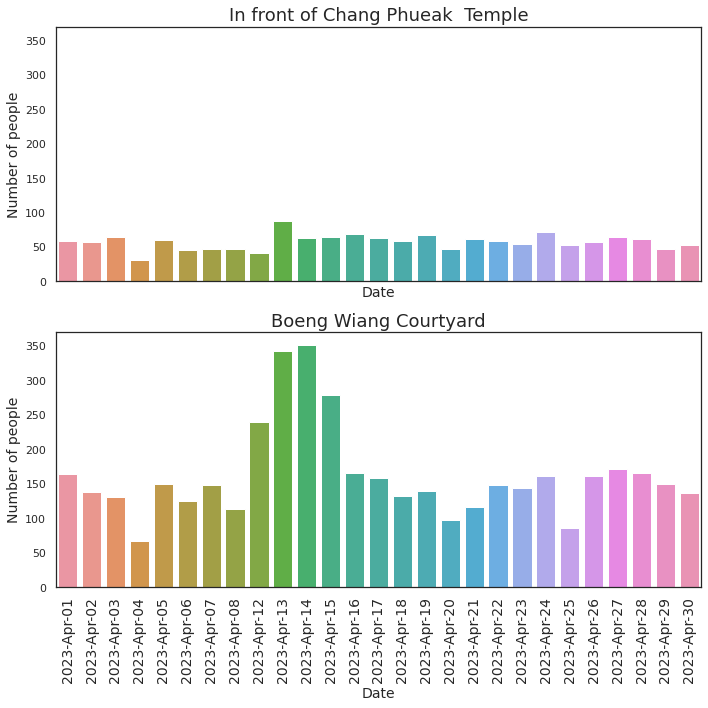

In [51]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(10, 10))
site_list = apr2023_pd_df.columns
ax0 = sns.barplot(x=apr2023_pd_df.index, y=apr2023_pd_df[site_list[1]],data=apr2023_pd_df,ax=ax[0])
ax[0].set_title(site_list[1],fontsize=18)
ax[0].set_xlabel('Date',fontsize=14)
ax[0].set_ylabel('Number of people',fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90,fontsize=14)
ax1 = sns.barplot(x=apr2023_pd_df.index, y=apr2023_pd_df[site_list[0]],data=apr2023_pd_df,ax=ax[1])
ax[1].set_title(site_list[0],fontsize=18)
ax[1].set_xlabel('Date',fontsize=14)
ax[1].set_ylabel('Number of people',fontsize=14)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90,fontsize=14)
plt.tight_layout();

In [52]:
apr202314_df_focus = apr2023_df.filter(apr2023_df['aprDate']=='2023-Apr-14')
apr202314_df_focus.show()

+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+-----------+
|siteid|          timestamp|deviceid|            sitename|day_of_week|hrs|minutes| day_period|yearMonth|     Myy|    aprDate|
+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+-----------+
|     4|2023-04-14 00:00:06|    2979|In front of Klang...|     Friday|  0|      0|00:00-02:59|  2023-04|2023-Apr|2023-Apr-14|
|     6|2023-04-14 00:02:06|    1658|      Naga Courtyard|     Friday|  0|      2|00:00-02:59|  2023-04|2023-Apr|2023-Apr-14|
|     5|2023-04-14 00:07:06|    4127|Sri Chiang Mai Co...|     Friday|  0|      7|00:00-02:59|  2023-04|2023-Apr|2023-Apr-14|
|    11|2023-04-14 00:08:03|    3512|              Soi-16|     Friday|  0|      8|00:00-02:59|  2023-04|2023-Apr|2023-Apr-14|
|     5|2023-04-14 00:09:06|    2679|Sri Chiang Mai Co...|     Friday|  0|      9|00:00-02:59|  2023-04|2023-Apr|2023-

In [53]:
apr202314_df_pivot = apr202314_df_focus.groupBy('hrs').pivot('sitename').agg(sparkf.countDistinct('deviceid')).na.fill(0).orderBy('hrs')
apr202314_df_pivot.show()

+---+---------------------+--------------------------------+------------------------+-----------------------------+------------------------+--------------+------+------+------------------------------------+
|hrs|Boeng Wiang Courtyard|In front of Chang Phueak  Temple|In front of Fresh Market|In front of Had Pathum Temple|In front of Klang Temple|Naga Courtyard|Soi-16|Soi-19|Sri Chiang Mai Community Health Park|
+---+---------------------+--------------------------------+------------------------+-----------------------------+------------------------+--------------+------+------+------------------------------------+
|  0|                   29|                               5|                      26|                           20|                      13|            19|    10|     3|                                  24|
|  1|                   12|                               1|                      15|                            9|                       9|             9|     4|     0|   

In [54]:
apr202314_pd_df = apr202314_df_pivot.toPandas()
apr202314_pd_df.set_index('hrs',inplace=True)
apr202314_pd_df

,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park
hrs,,,,,,,,,
0,29,5,26,20,13,19,10,3,24
1,12,1,15,9,9,9,4,0,9
2,8,2,10,5,7,11,3,0,9
3,2,1,15,4,3,6,2,0,6
4,2,0,24,4,3,7,2,0,4
5,1,0,32,1,3,1,2,1,1
6,9,4,47,8,15,8,4,2,11
7,16,8,62,13,22,10,9,3,18
8,12,9,69,17,28,9,10,4,20


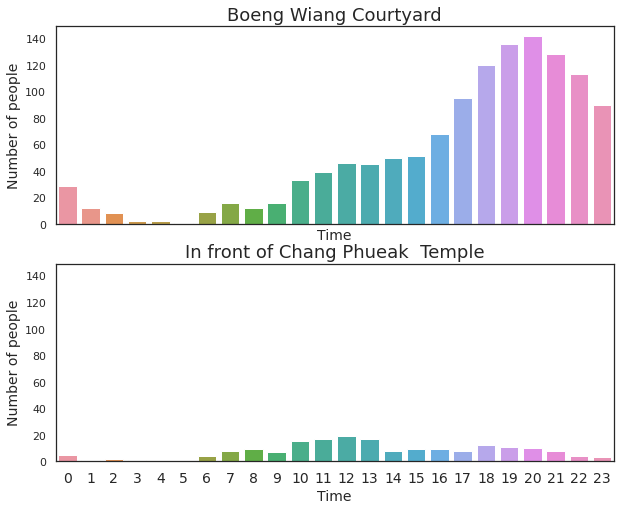

In [55]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(10,8))
site_list = apr202314_pd_df.columns
ax0 = sns.barplot(x=apr202314_pd_df.index, y=apr202314_pd_df[site_list[0]],data=apr202314_pd_df,ax=ax[0])
ax[0].set_title(site_list[0],fontsize=18)
ax[0].set_ylabel('Number of people',fontsize=14)
ax[0].set_xlabel('Time',fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90,fontsize=14)
ax1 = sns.barplot(x=apr202314_pd_df.index, y=apr202314_pd_df[site_list[1]],data=apr202314_pd_df,ax=ax[1])
ax[1].set_title(site_list[1],fontsize=18)
ax[1].set_ylabel('Number of people',fontsize=14)
ax[1].set_xlabel('Time',fontsize=14)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0,fontsize=14);

In [56]:
apr202314_hrs_focus = apr202314_df_focus.filter((apr202314_df_focus['hrs']=='17')&(apr202314_df_focus['minutes'].between(30,59)))
apr202314_hrs_focus.show()

+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+-----------+
|siteid|          timestamp|deviceid|            sitename|day_of_week|hrs|minutes| day_period|yearMonth|     Myy|    aprDate|
+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+-----------+
|     9|2023-04-14 17:31:10|     902|In front of Fresh...|     Friday| 17|     31|15:00-17:59|  2023-04|2023-Apr|2023-Apr-14|
|     4|2023-04-14 17:31:11|    3976|In front of Klang...|     Friday| 17|     31|15:00-17:59|  2023-04|2023-Apr|2023-Apr-14|
|     6|2023-04-14 17:31:13|    1368|      Naga Courtyard|     Friday| 17|     31|15:00-17:59|  2023-04|2023-Apr|2023-Apr-14|
|     4|2023-04-14 17:33:11|    2479|In front of Klang...|     Friday| 17|     33|15:00-17:59|  2023-04|2023-Apr|2023-Apr-14|
|     7|2023-04-14 17:34:07|     989|In front of Had P...|     Friday| 17|     34|15:00-17:59|  2023-04|2023-Apr|2023-

In [57]:
apr202314_hrs_focus = apr202314_hrs_focus.withColumn('clock',sparkf.date_format('timestamp','HH:mm'))
apr202314_hrs_focus.show()

+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+-----------+-----+
|siteid|          timestamp|deviceid|            sitename|day_of_week|hrs|minutes| day_period|yearMonth|     Myy|    aprDate|clock|
+------+-------------------+--------+--------------------+-----------+---+-------+-----------+---------+--------+-----------+-----+
|     9|2023-04-14 17:31:10|     902|In front of Fresh...|     Friday| 17|     31|15:00-17:59|  2023-04|2023-Apr|2023-Apr-14|17:31|
|     4|2023-04-14 17:31:11|    3976|In front of Klang...|     Friday| 17|     31|15:00-17:59|  2023-04|2023-Apr|2023-Apr-14|17:31|
|     6|2023-04-14 17:31:13|    1368|      Naga Courtyard|     Friday| 17|     31|15:00-17:59|  2023-04|2023-Apr|2023-Apr-14|17:31|
|     4|2023-04-14 17:33:11|    2479|In front of Klang...|     Friday| 17|     33|15:00-17:59|  2023-04|2023-Apr|2023-Apr-14|17:33|
|     7|2023-04-14 17:34:07|     989|In front of Had P...|     Friday| 17|  

In [58]:
apr202314_hrs_pivot = apr202314_hrs_focus.groupBy('clock').pivot('sitename').agg(sparkf.countDistinct('deviceid')).na.fill(0).orderBy('clock')
apr202314_hrs_pivot.show()

+-----+---------------------+--------------------------------+------------------------+-----------------------------+------------------------+--------------+------+------+------------------------------------+
|clock|Boeng Wiang Courtyard|In front of Chang Phueak  Temple|In front of Fresh Market|In front of Had Pathum Temple|In front of Klang Temple|Naga Courtyard|Soi-16|Soi-19|Sri Chiang Mai Community Health Park|
+-----+---------------------+--------------------------------+------------------------+-----------------------------+------------------------+--------------+------+------+------------------------------------+
|17:30|                   64|                               6|                      40|                           47|                      21|            31|    14|     4|                                  27|
|17:31|                   65|                               6|                      41|                           46|                      21|            31|    14|

In [59]:
apr20231417_pd_df = apr202314_hrs_pivot.toPandas()
apr20231417_pd_df.set_index('clock',inplace=True)
apr20231417_pd_df

,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park
clock,,,,,,,,,
17:30,64,6,40,47,21,31,14,4,27
17:31,65,6,41,46,21,31,14,4,27
17:32,64,7,42,47,23,32,14,5,26
17:33,64,7,43,48,23,34,14,6,27
17:34,65,7,44,48,23,35,14,6,28
17:35,65,7,44,49,23,34,14,6,29
17:36,66,7,43,49,23,35,15,6,28
17:37,68,7,43,50,23,34,15,6,28
17:38,68,7,43,50,23,33,15,6,28


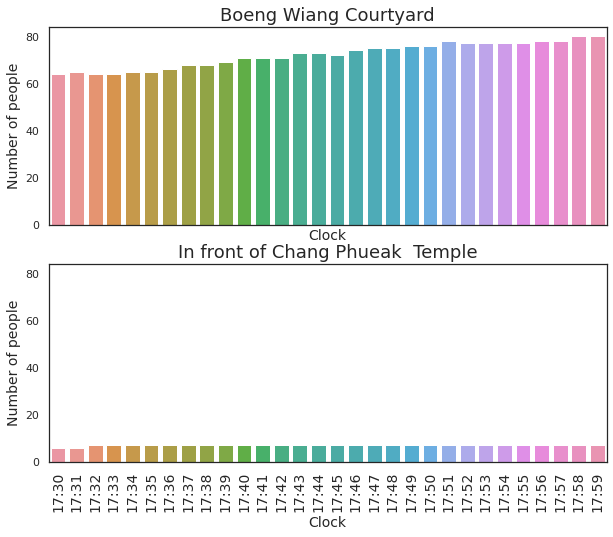

In [60]:
fig, ax = plt.subplots(2,1, sharex=True, sharey=True, figsize=(10,8))
site_list = apr20231417_pd_df.columns
ax0 = sns.barplot(x=apr20231417_pd_df.index, y=apr20231417_pd_df[site_list[0]],data=apr20231417_pd_df,ax=ax[0])
ax[0].set_title(site_list[0],fontsize=18)
ax[0].set_ylabel('Number of people',fontsize=14)
ax[0].set_xlabel('Clock',fontsize=14)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90,fontsize=14)
ax1 = sns.barplot(x=apr20231417_pd_df.index, y=apr20231417_pd_df[site_list[1]],data=apr20231417_pd_df,ax=ax[1])
ax[1].set_title(site_list[1],fontsize=18)
ax[1].set_ylabel('Number of people',fontsize=14)
ax[1].set_xlabel('Clock',fontsize=14)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90,fontsize=14);